<a href="https://colab.research.google.com/github/lmcanavals/dip/blob/main/04_01_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

In [ ]:
def show(im, size=8, color=None):
  _, ax = plt.subplots(figsize=(size, size))
  if color:
    ax.imshow(im, interpolation="nearest", cmap=color)
  else:
    ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

In [ ]:
base = "https://raw.githubusercontent.com/lmcanavals/dip/main/imagenes/"

In [ ]:
img1 = "lorito.jpg"
url = f"{base}{img1}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26704  100 26704    0     0   200k      0 --:--:-- --:--:-- --:--:--  200k


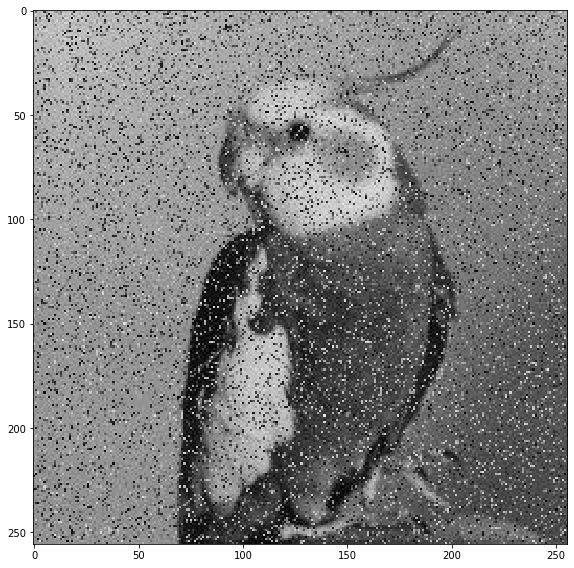

In [ ]:
lorito = loadImg(img1)
show(lorito)

(256, 256)


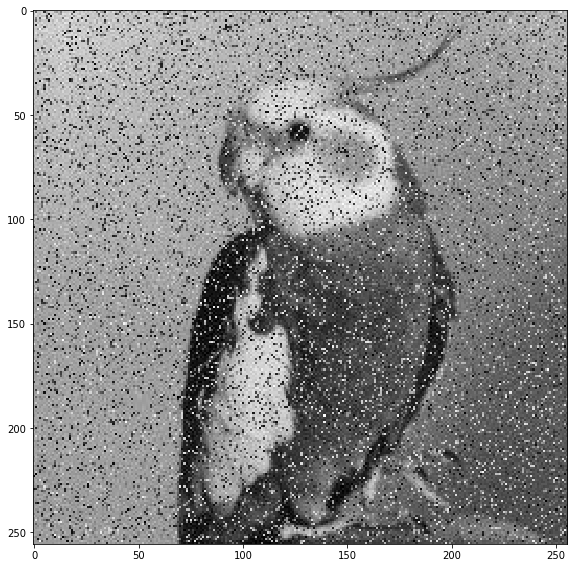

In [ ]:
loritogs = cv2.cvtColor(lorito, cv2.COLOR_BGR2GRAY)
print(loritogs.shape)
show(loritogs, color="gray")

## The filter function

In [ ]:
def filtering(im, mask):
  rowsMask, colsMask = mask.shape
  rowPadding = rowsMask // 2
  colPadding = colsMask // 2

  rows, cols = im.shape

  temp = np.zeros((rows + 2*rowPadding, cols + 2*colPadding))
  temp[rowPadding:rowPadding+rows, colPadding:colPadding+cols] = im

  out = np.zeros_like(temp)

  for r in range(rows):
    for c in range(cols):
      accum = 0
      for i in range(-rowPadding, rowPadding + 1):
        for j in range(-colPadding, colPadding + 1):
          accum += temp[r + i, c + j] * mask[i + rowPadding, j + colPadding]
      out[r + rowPadding, c + colPadding] = accum

  return out[rowPadding:rowPadding+rows, colPadding:colPadding+cols]

## Gaussian Blur

In [ ]:
mask = np.array([1, 2, 1, 2, 4, 2, 1, 2, 1]).reshape(3, 3)
print(mask)

[[1 2 1]
 [2 4 2]
 [1 2 1]]


In [ ]:
mask = mask / np.sum(mask)
print(mask)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


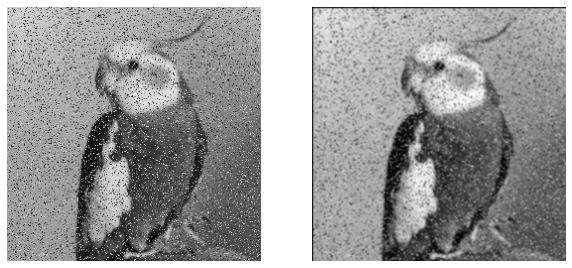

In [ ]:
loritogs2 = filtering(loritogs, mask)
plt.subplots(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(loritogs, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(loritogs2, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
%timeit filtering(loritogs, mask)

1 loop, best of 5: 558 ms per loop


In [ ]:
a = np.array([1, 2, 3, 4, 5, 6]).reshape(2, 3)
b = np.array([2, 2, 2, 3, 3, 3]).reshape(2, 3)
print(a)
print(b)
c = np.multiply(a, b)
print(c)

[[1 2 3]
 [4 5 6]]
[[2 2 2]
 [3 3 3]]
[[ 2  4  6]
 [12 15 18]]


In [ ]:
def filtering2(im, mask):
  rowsMask, colsMask = mask.shape
  rowPadding = rowsMask // 2
  colPadding = colsMask // 2

  rows, cols = im.shape

  temp = np.zeros((rows + 2*rowPadding, cols + 2*colPadding))
  temp[rowPadding:rowPadding+rows, colPadding:colPadding+cols] = im

  out = np.zeros_like(temp)

  for r in range(rows):
    for c in range(cols):
      out[r + rowPadding, c + colPadding] = np.sum(
        np.multiply(mask, temp[r:r+rowsMask, c:c+colsMask]))

  return out[rowPadding:rowPadding+rows, colPadding:colPadding+cols]

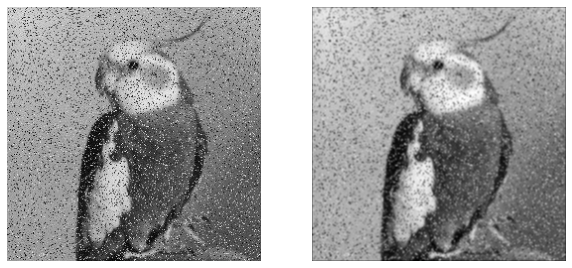

In [ ]:
loritogs2 = filtering2(loritogs, mask)
plt.subplots(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(loritogs, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(loritogs2, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
%timeit filtering2(loritogs, mask)

1 loop, best of 5: 451 ms per loop


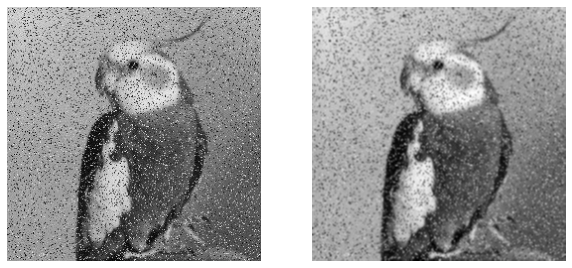

In [ ]:
loritogs2 = cv2.filter2D(src=loritogs, ddepth=-1, kernel=mask)
plt.subplots(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(loritogs, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(loritogs2, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
%timeit cv2.filter2D(src=loritogs, ddepth=-1, kernel=mask)

The slowest run took 5.47 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 103 µs per loop


In [ ]:
img2 = "noise2.png"
url = f"{base}{img2}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48819  100 48819    0     0   132k      0 --:--:-- --:--:-- --:--:--  132k


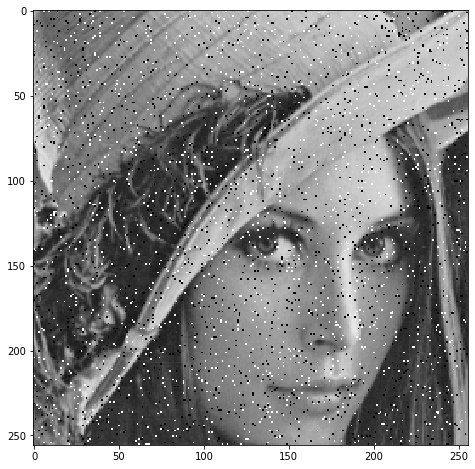

In [ ]:
noise1 = loadImg(img2)
show(noise1)

In [ ]:
noise1.shape

(256, 256, 3)

(256, 256)


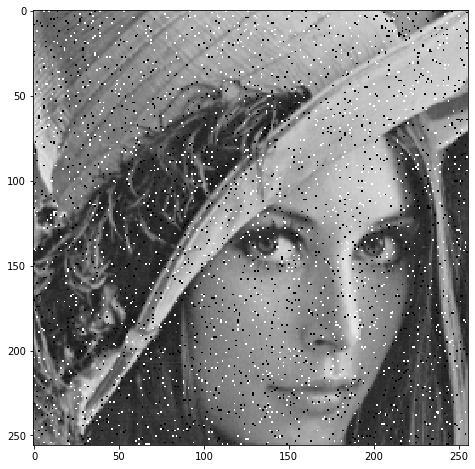

In [ ]:
noise = cv2.cvtColor(noise1, cv2.COLOR_BGR2GRAY)
print(noise.shape)
show(noise, color="gray")

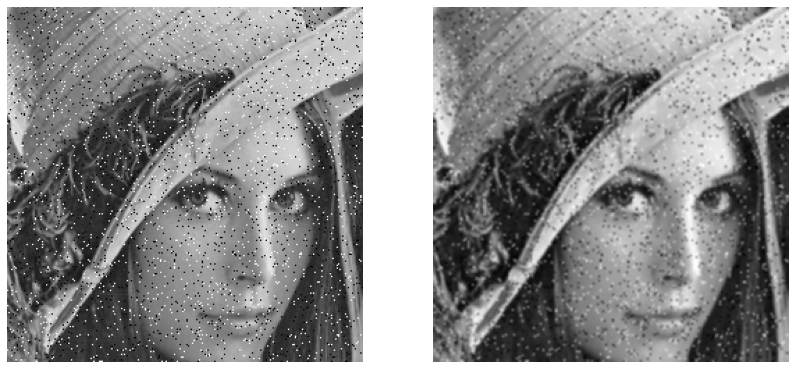

In [ ]:
nonoise = cv2.filter2D(src=noise, ddepth=-1, kernel=mask)
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(noise, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(nonoise, cmap="gray")
plt.axis("off")
plt.show()

# Mean Filter

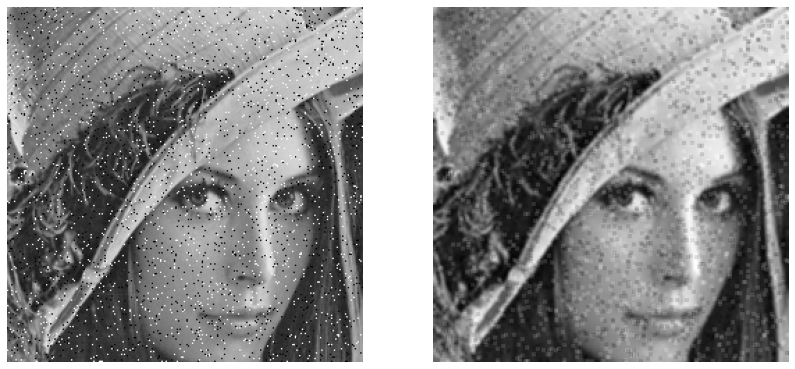

In [ ]:
mask = np.full((3, 3), 1/9)
nonoise = cv2.filter2D(src=noise, ddepth=-1, kernel=mask)
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(noise, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(nonoise, cmap="gray")
plt.axis("off")
plt.show()

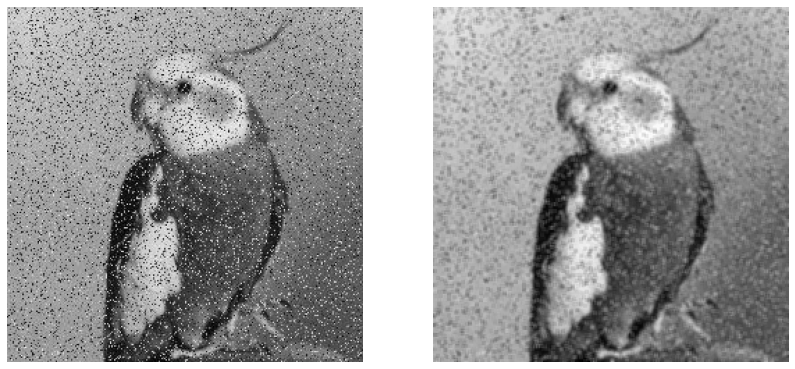

In [ ]:
mask = np.full((3, 3), 1/9)
loritogs2 = cv2.filter2D(src=loritogs, ddepth=-1, kernel=mask)
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(loritogs, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(loritogs2, cmap="gray")
plt.axis("off")
plt.show()

# Median Filter

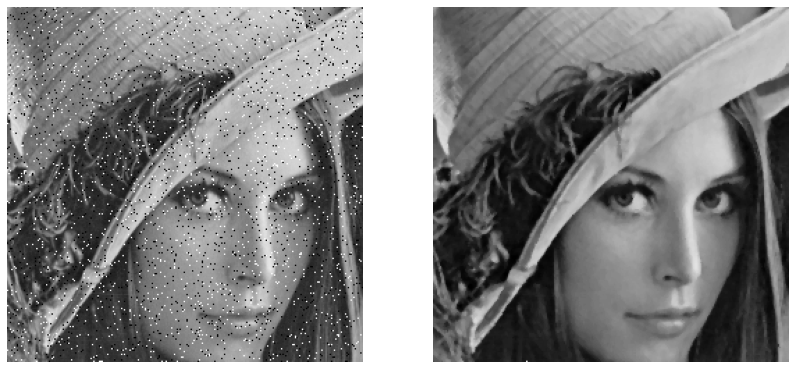

In [ ]:
nonoise = cv2.medianBlur(noise, 3)
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(noise, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(nonoise, cmap="gray")
plt.axis("off")
plt.show()

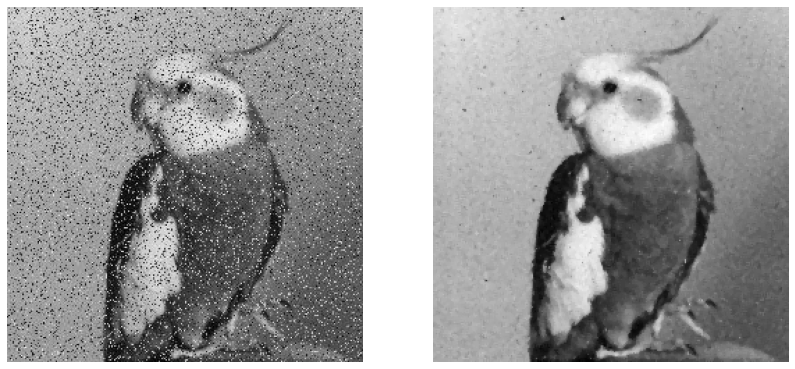

In [ ]:
loritogs2 = cv2.medianBlur(loritogs, 3)
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(loritogs, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(loritogs2, cmap="gray")
plt.axis("off")
plt.show()

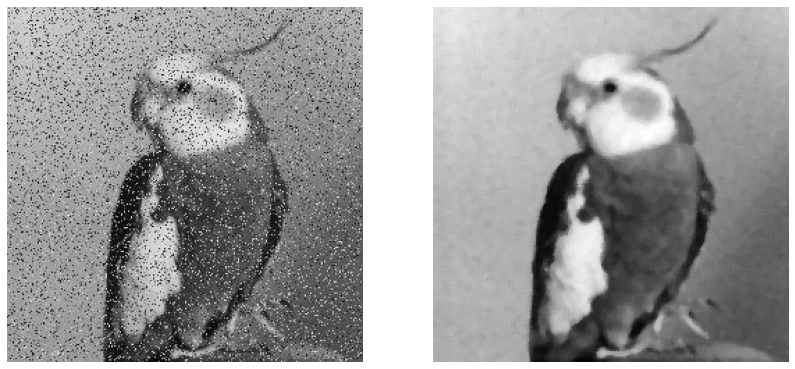

In [ ]:
loritogs2 = cv2.medianBlur(loritogs, 5)
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(loritogs, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(loritogs2, cmap="gray")
plt.axis("off")
plt.show()

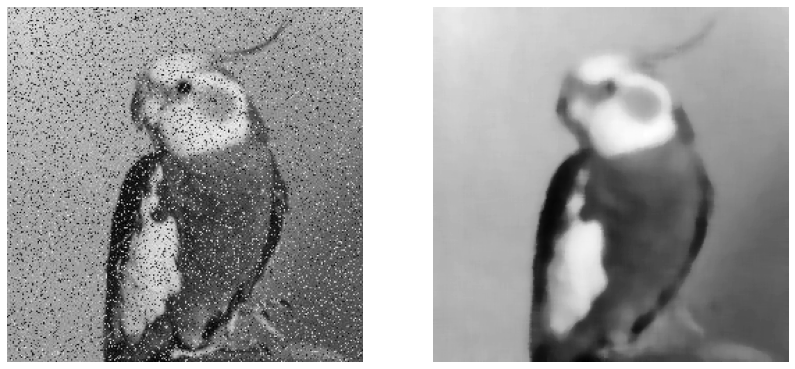

In [ ]:
loritogs2 = cv2.medianBlur(loritogs, 11)
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(loritogs, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(loritogs2, cmap="gray")
plt.axis("off")
plt.show()